In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestRegressor for regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:

# Load Dataset
print("Data Set ")
data = pd.read_csv("crop_yield.csv")
new_data = data
print(data)

Data Set 
                Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide       

In [ ]:
# Dimension of Dataset
print("------------------------------------------------------------------------")
print("Shape of a Data")
dim = data.shape
print(dim)


------------------------------------------------------------------------
Shape of a Data
(19689, 10)


In [ ]:
# Datatypes
print("------------------------------------------------------------------------")
print("Data Types of each Attribute")
print(data.dtypes)

------------------------------------------------------------------------
Data Types of each Attribute
Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [ ]:
# Peek at the Dataset
print("------------------------------------------------------------------------")
print("Top values from a dataset")
print(data.head(10))


------------------------------------------------------------------------
Top values from a dataset
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   
5  Dry chillies       1997  Whole Year   Assam  13587.0        9073   
6          Gram       1997  Rabi         Assam   2979.0        1507   
7          Jute       1997  Kharif       Assam  94520.0      904095   
8       Linseed       1997  Rabi         Assam  10098.0        5158   
9         Maize       1997  Kharif       Assam  19216.0       14721   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1    

In [ ]:
# Statistical Summary
print("------------------------------------------------------------------------")
print("Describe method")
print(data.describe())


------------------------------------------------------------------------
Describe method
          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000 

In [ ]:
# Check missing values
print("------------------------------------------------------------------------")
print("Check Missing values ")
nullValue = data.isnull().sum()
print(nullValue)

------------------------------------------------------------------------
Check Missing values 
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [ ]:
# Crop Distribution
print("------------------------------------------------------------------------")
print(data.groupby('Crop').size())
print("------------------------------------------------------------------------")
print(data.groupby('Crop_Year').size())
print("------------------------------------------------------------------------")
print(data.groupby('State').size())

------------------------------------------------------------------------
Crop
Arecanut                  162
Arhar/Tur                 508
Bajra                     524
Banana                    245
Barley                    297
Black pepper              126
Cardamom                   74
Cashewnut                 134
Castor seed               300
Coconut                   172
Coriander                 199
Cotton(lint)              476
Cowpea(Lobia)             134
Dry chillies              419
Garlic                    250
Ginger                    323
Gram                      490
Groundnut                 725
Guar seed                  63
Horse-gram                371
Jowar                     513
Jute                      181
Khesari                    75
Linseed                   308
Maize                     975
Masoor                    324
Mesta                     210
Moong(Green Gram)         740
Moth                      110
Niger seed                192
Oilseeds total        

In [ ]:
# Analysis total production of crop per year
print("------------------------------------------------------------------------")
print("Analysis total production of crop per year")
total_prod = data.groupby('Crop_Year')['Production'].sum().sort_values(ascending=False)
print(total_prod)


------------------------------------------------------------------------
Analysis total production of crop per year
Crop_Year
2011    19260119964
2015    18329298670
2019    18272602364
2018    17933914698
2014    17729042495
2013    17040254359
2009    16604163998
2016    16357287264
2008    16165771744
2017    15873843241
2006    15702675600
2005    14951210018
2007    14471191552
2004    13817065380
2012    13030757834
2002    12409349456
2003    12313711969
2010    11952654246
2000     9562470060
2001     9314563490
1999     8550025528
1998     7868086697
1997     6087009873
2020       10177226
Name: Production, dtype: int64


In [ ]:
#Assuming 'data' is your DataFrame
# Extract the year from 'Crop_Year' column (assuming 'Crop_Year' is in a datetime format)
print("------------------------------------------------------------------------")
data['Year'] = data['Crop_Year']

------------------------------------------------------------------------


In [ ]:
# Group the data by 'Year', 'Season', and 'Crop' and sum the 'Production' for each group

year_season_crop_production = data.groupby(['Year', 'Season', 'Crop'])['Production'].sum().reset_index()
sorted_year_season_crop_production = year_season_crop_production.sort_values(by=['Year', 'Production'], ascending=[False,False])
print(sorted_year_season_crop_production)

      Year       Season           Crop  Production
3322  2020  Whole Year       Sugarcane     7970299
3313  2020  Rabi                 Wheat      937003
3298  2020  Kharif                Rice      669372
3297  2020  Kharif                Ragi      125898
3300  2020  Kharif       Small millets       65289
...    ...          ...            ...         ...
117   1997  Winter               Maize         136
12    1997  Kharif            Coconut           40
21    1997  Kharif             Linseed          22
42    1997  Rabi           Castor seed          15
109   1997  Whole Year       Sunflower           1

[3325 rows x 4 columns]


In [ ]:

# Group the data by 'Crop' and sum the 'Production' for each crop
print("------------------------------------------------------------------------")
crop_prod = data.groupby('Crop')['Production'].sum()
high_crop = crop_prod.idxmax()
high_value = crop_prod.max()
low_crop = crop_prod.idxmin()
low_value = crop_prod.min()

print(f"The crop with the highest production is {high_crop} with a production of {high_value}")
print(f"The crop with the lowest production is {low_crop} with a production of {low_value}")



------------------------------------------------------------------------
The crop with the highest production is Coconut  with a production of 308751970278
The crop with the lowest production is Other Summer Pulses with a production of 8394


In [ ]:

# Analysis which states are the top producers of specific crops
print("------------------------------------------------------------------------")

unique_crops = data['Crop'].unique()
state_data = []

for crop in unique_crops:
    crop_data = data[data['Crop'] == crop]
    state_production = crop_data.groupby('State')['Production'].sum()
    top_producing_states = state_production.sort_values(ascending=False)
    top_state = top_producing_states.index[0]
    state_data.append({'Crop': crop, 'Top Producing State': top_state})

df = pd.DataFrame(state_data)
print(df)

------------------------------------------------------------------------
                     Crop Top Producing State
0                Arecanut           Karnataka
1               Arhar/Tur         Maharashtra
2             Castor seed             Gujarat
3                Coconut               Kerala
4            Cotton(lint)             Gujarat
5            Dry chillies      Andhra Pradesh
6                    Gram      Madhya Pradesh
7                    Jute         West Bengal
8                 Linseed      Madhya Pradesh
9                   Maize           Karnataka
10                  Mesta      Andhra Pradesh
11             Niger seed         West Bengal
12                  Onion      Madhya Pradesh
13     Other  Rabi pulses      Madhya Pradesh
14                 Potato       Uttar Pradesh
15      Rapeseed &Mustard             Haryana
16                   Rice         West Bengal
17                Sesamum         West Bengal
18          Small millets         Maharashtra
19     

In [ ]:
print("------------------------------------------------------------------------")
print("crop production vary with different seasons")
seasonal_production = data.groupby('Season')['Production'].sum().sort_values(ascending=False)
seasonal_production_df = pd.DataFrame(seasonal_production)
print(seasonal_production_df)


------------------------------------------------------------------------
crop production vary with different seasons
               Production
Season                   
Whole Year   314452748974
Kharif         5402484780
Rabi           2837368229
Winter          586507936
Summer          243731156
Autumn           84406651


In [ ]:
# Analysis average yield for different crops
print("------------------------------------------------------------------------")
print("Analysis average yield for different crops")
average_yield_by_crop = data.groupby('Crop')['Yield'].mean().sort_values(ascending=False)
average_yield_by_crop_df = pd.DataFrame(average_yield_by_crop)
print(average_yield_by_crop_df)

------------------------------------------------------------------------
Analysis average yield for different crops
                             Yield
Crop                              
Coconut                8652.000199
Sugarcane                51.727439
Banana                   26.851128
Tapioca                  16.667301
Potato                   13.331718
Onion                    13.247525
Sweet potato              9.240788
Jute                      7.555393
Ginger                    6.442202
Mesta                     5.389204
Garlic                    4.544886
Maize                     3.427216
Turmeric                  3.325392
Cashewnut                 3.120438
Bajra                     2.427462
Rice                      2.218495
Tobacco                   2.110708
Dry chillies              2.078330
Arecanut                  2.073635
Wheat                     2.005086
Oilseeds total            1.995559
Cotton(lint)              1.797044
other oilseeds            1.789220
Barley   

In [ ]:

# Calculate the correlation between 'Annual_Rainfall' and 'Production'
print("------------------------------------------------------------------------")
correlation = data['Annual_Rainfall'].corr(data['Production'])
print(f"Correlation between Annual Rainfall and Crop Production: {correlation}")


------------------------------------------------------------------------
Correlation between Annual Rainfall and Crop Production: 0.029879391233072337


# Visualization

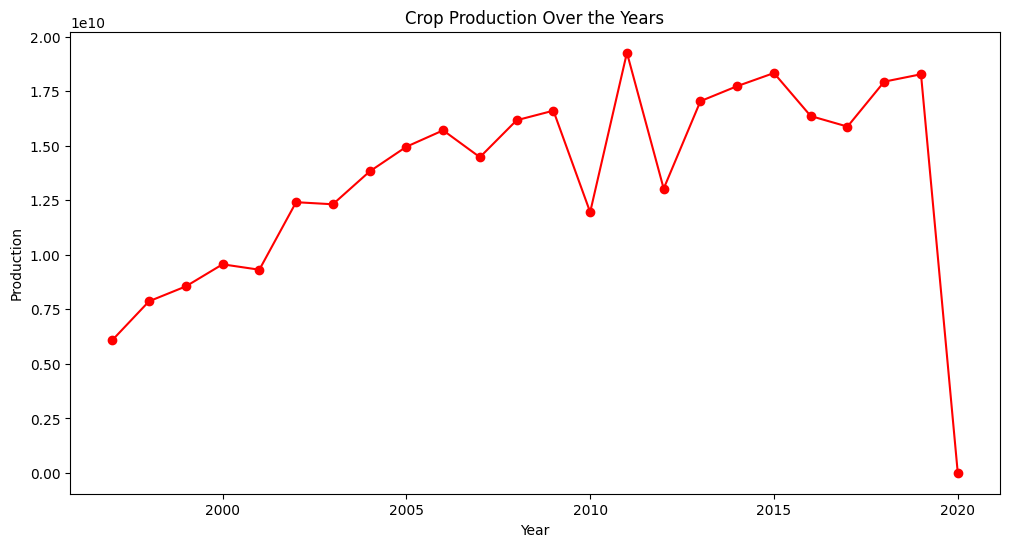

In [ ]:


# How does crop production change over the years?
year_prod = data.groupby('Crop_Year')['Production'].sum()

plt.figure(figsize=(12,6))
plt.plot(year_prod.index,year_prod.values,marker='o',color='red')
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()


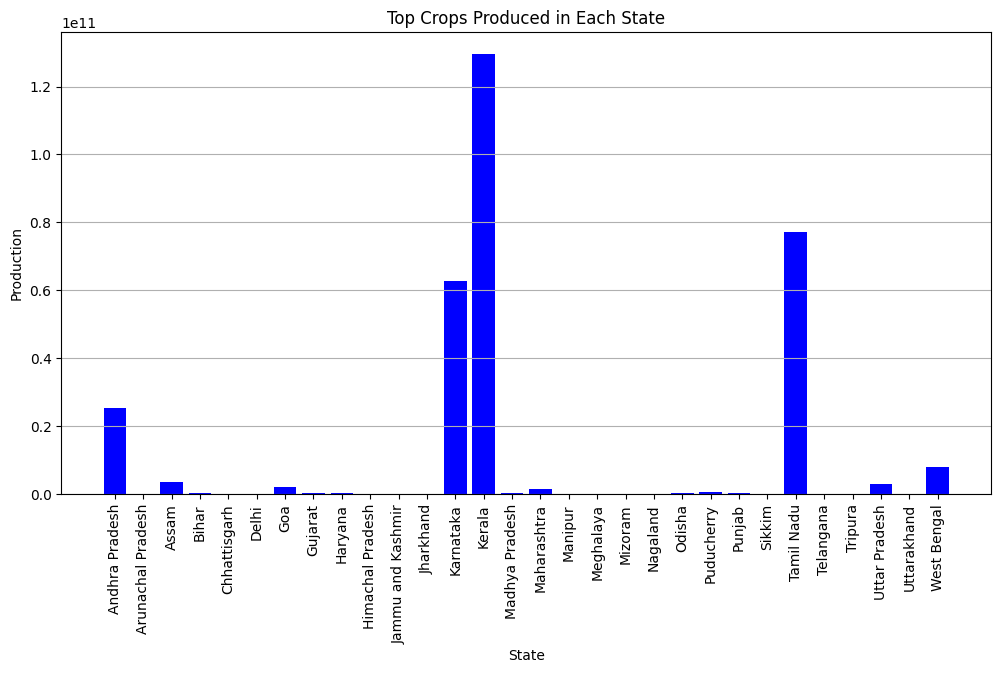

In [ ]:
#  What are the top crops produced in each state?
state_prod = data.groupby(['State','Crop'])['Production'].sum()
state_prod = state_prod.reset_index()
top_crops_in_states = state_prod.groupby('State').apply(lambda x: x.nlargest(1, 'Production'))
plt.figure(figsize=(12, 6))
plt.bar(top_crops_in_states['State'], top_crops_in_states['Production'], color='b')
plt.title('Top Crops Produced in Each State')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

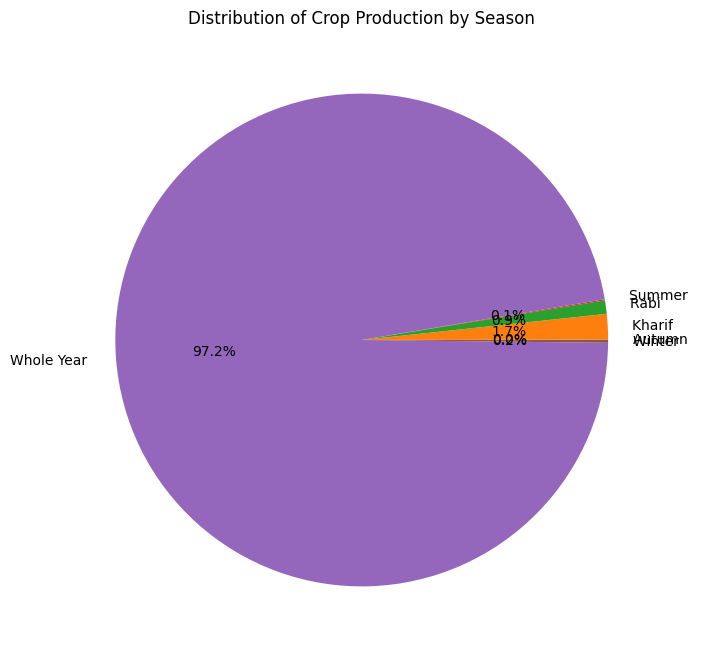

In [ ]:
# Distribution of crop production by year
season_prod = data.groupby('Season')['Production'].sum()
plt.figure(figsize=(8,8))
plt.pie(season_prod, labels=season_prod.index, autopct='%1.1f%%')
plt.title('Distribution of Crop Production by Season')
plt.show()

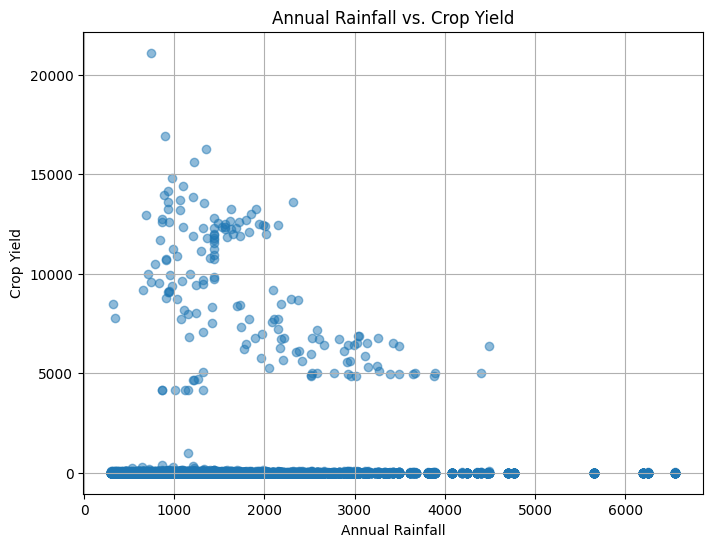

In [ ]:
# Create a scatter plot to visualize the relationship between annual rainfall and crop yield
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Rainfall'], data['Yield'], alpha=0.5)
plt.title('Annual Rainfall vs. Crop Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


In [ ]:
# Select the columns you want to include in the correlation analysis
selected_columns = ['Production', 'Annual_Rainfall']
selected_data = data[selected_columns]
correlation_matrix = selected_data.corr()

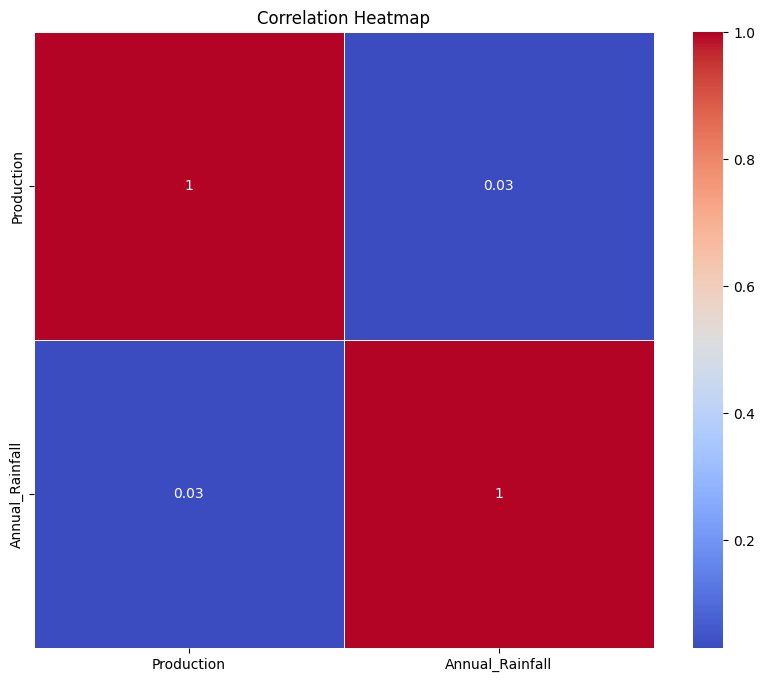

In [ ]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#  Compare crop production for specific crops in different seasons.
unique_crops = data['Crop'].unique()

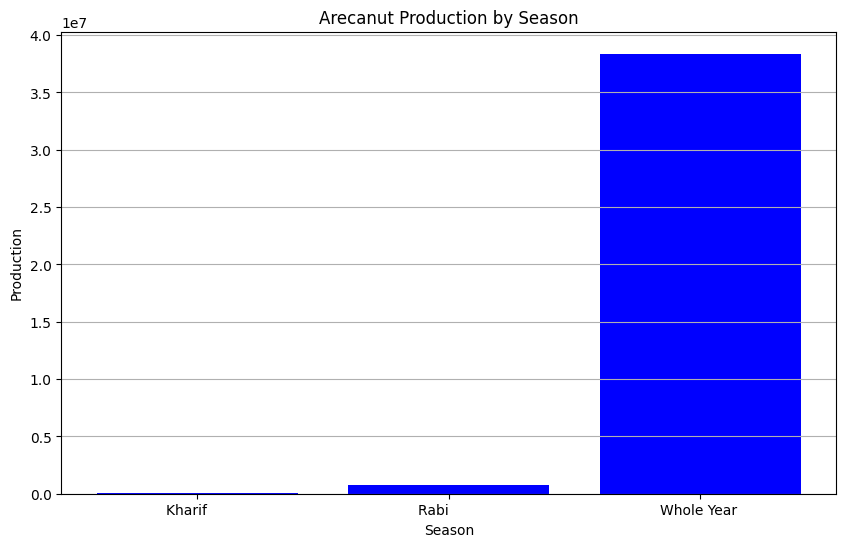

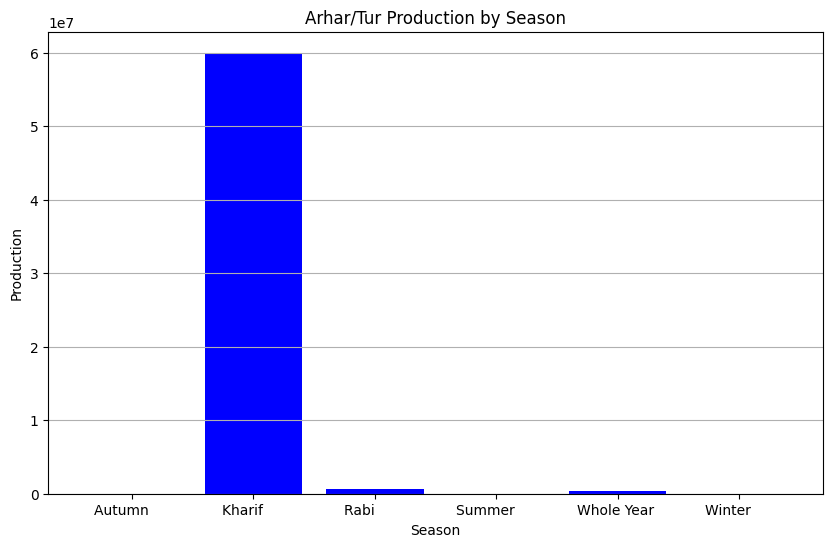

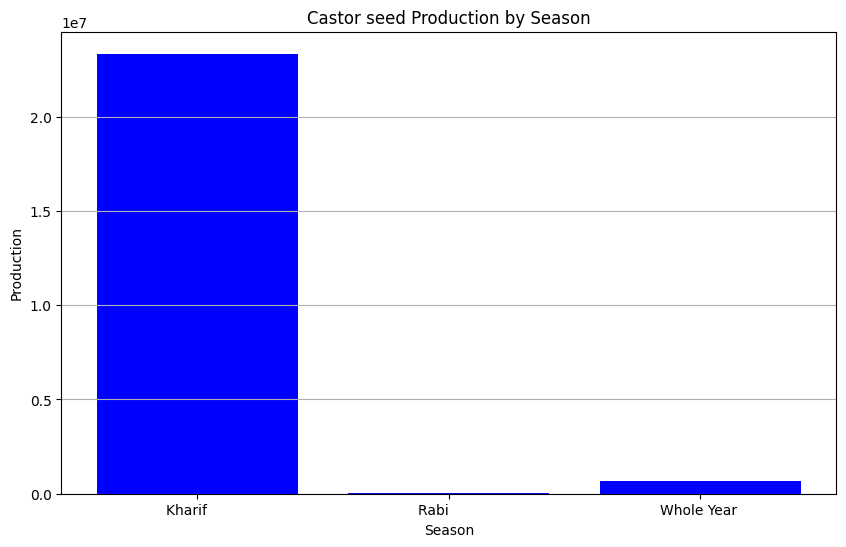

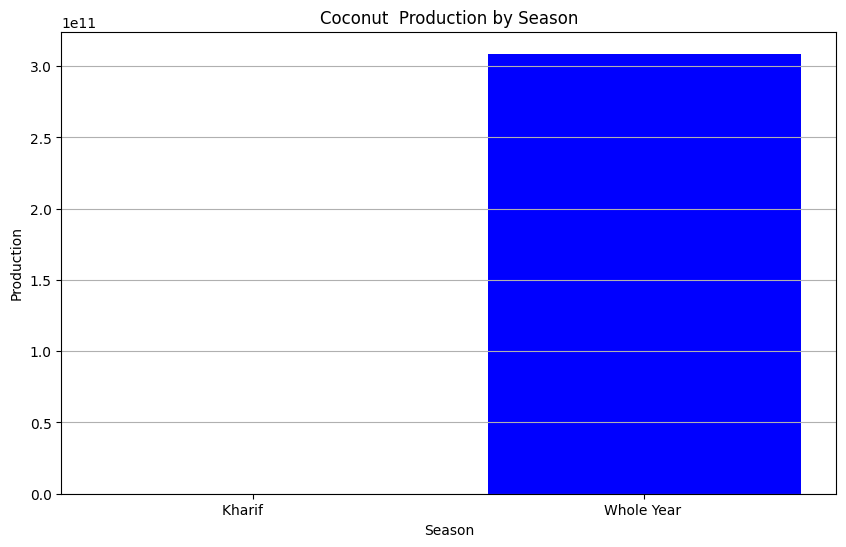

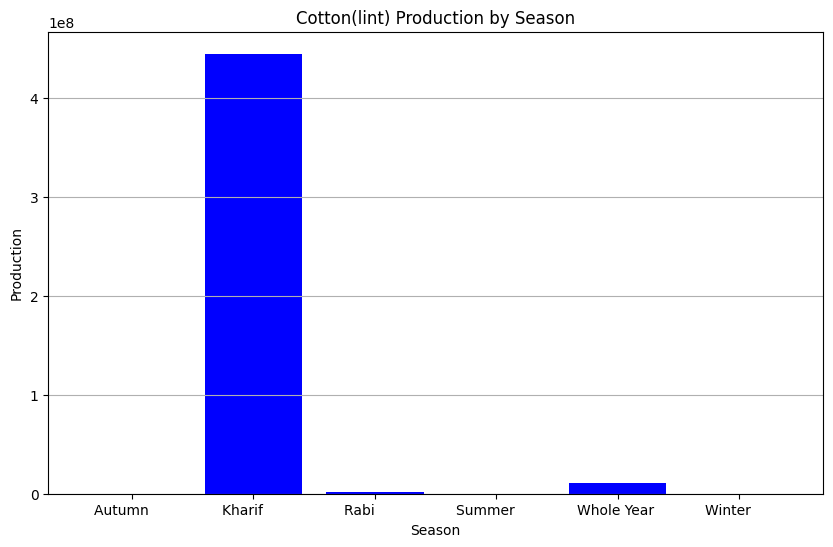

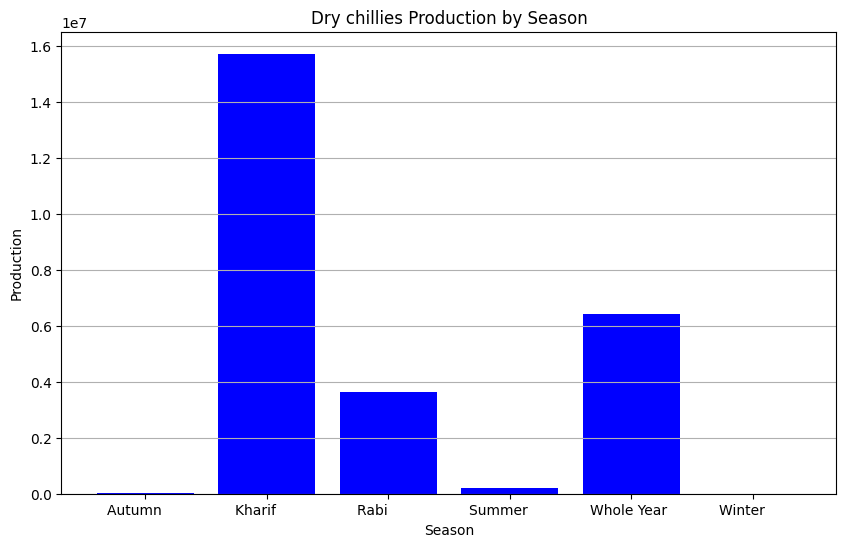

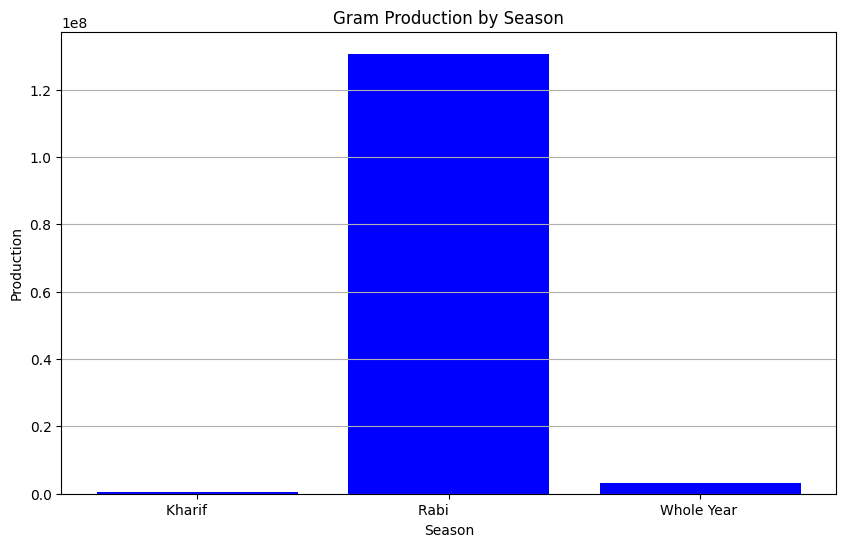

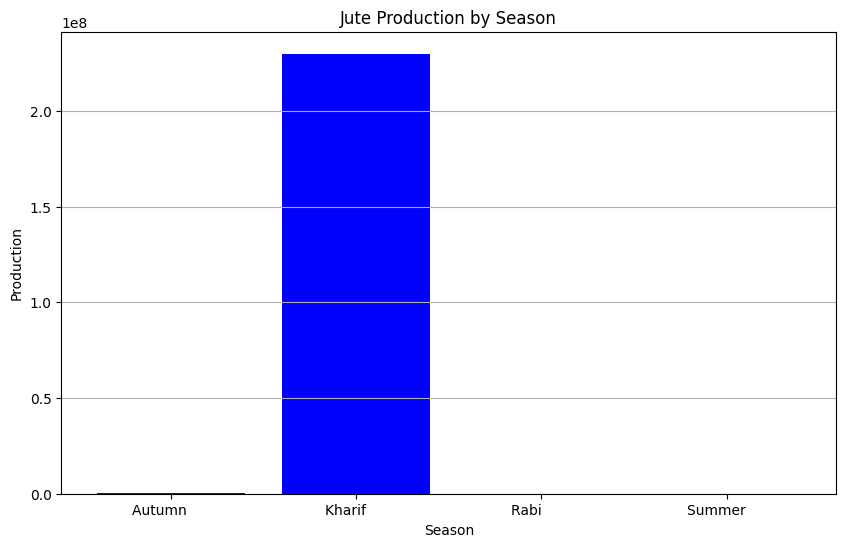

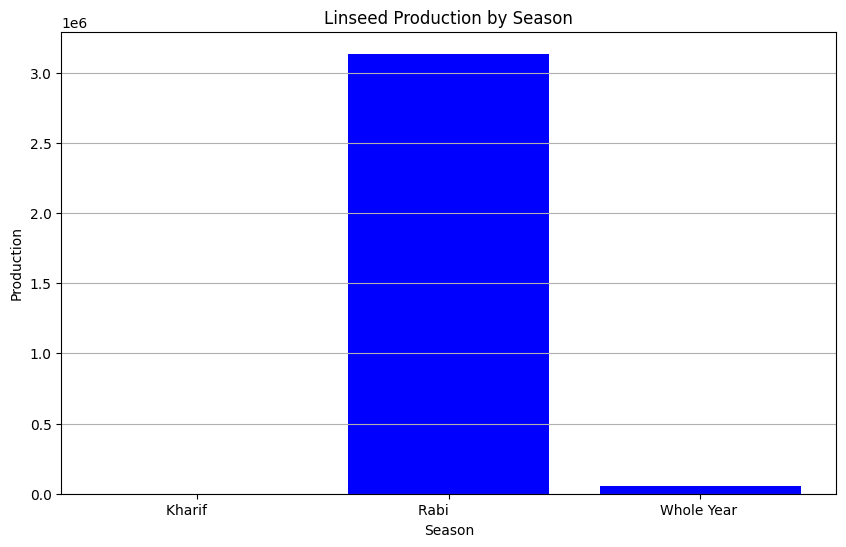

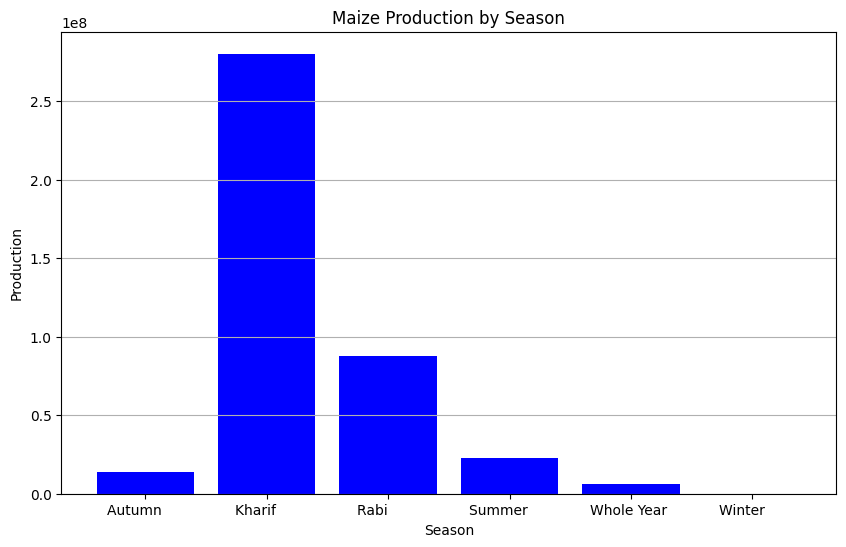

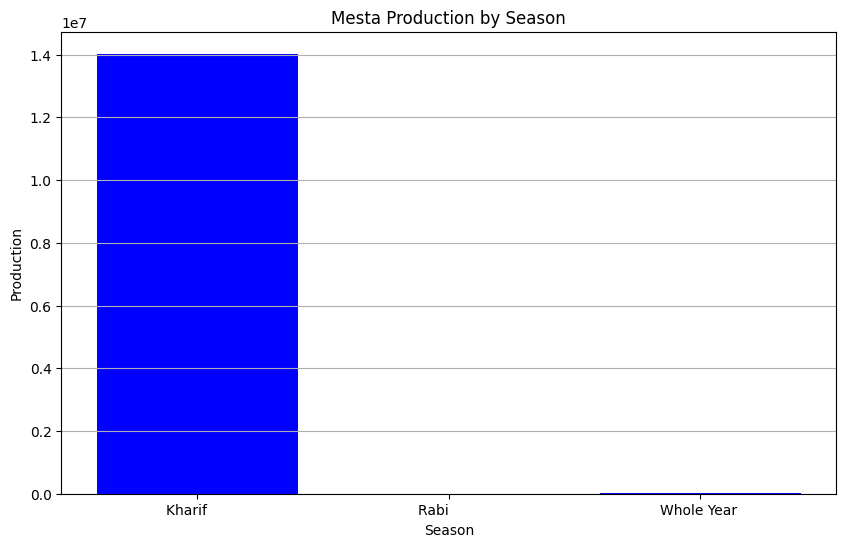

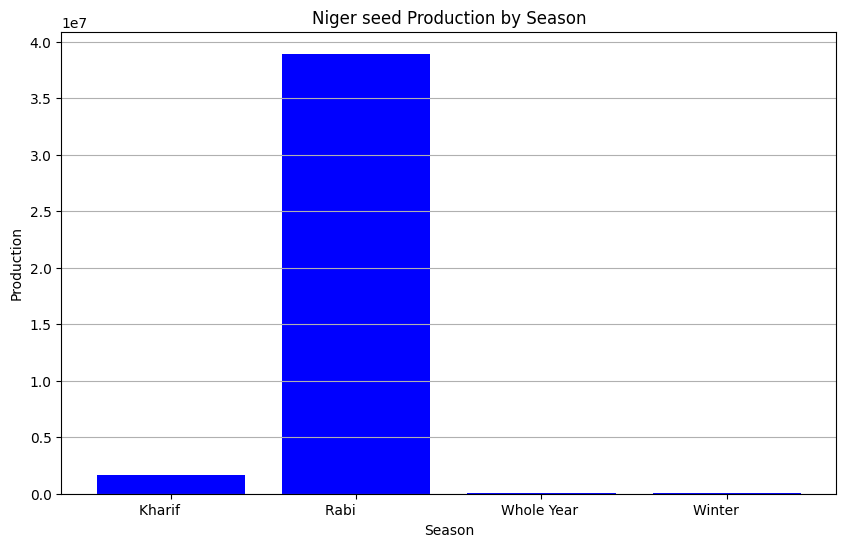

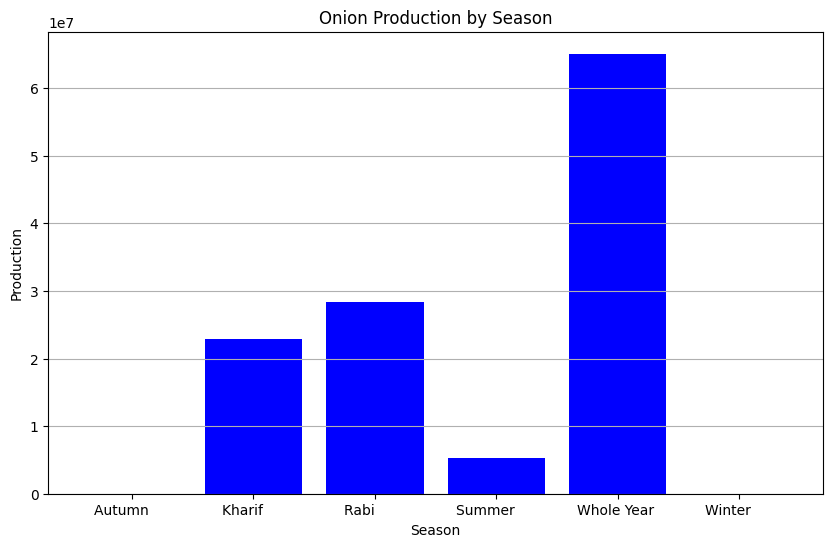

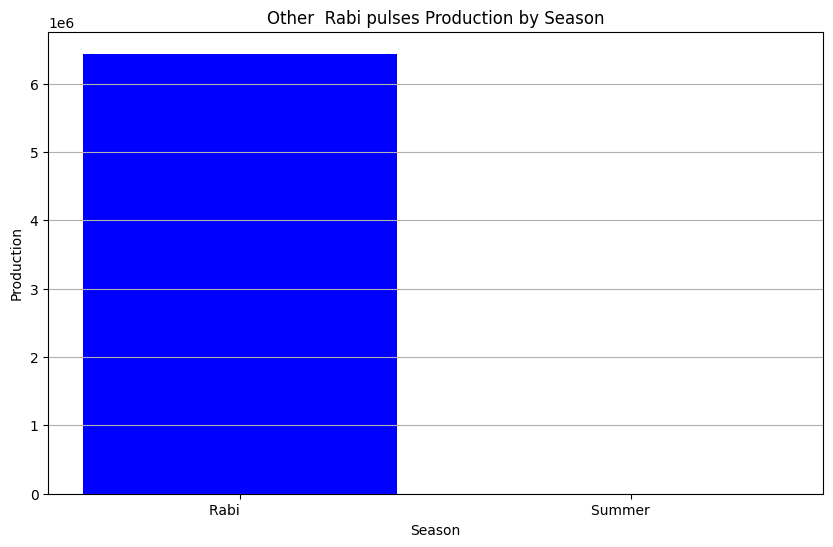

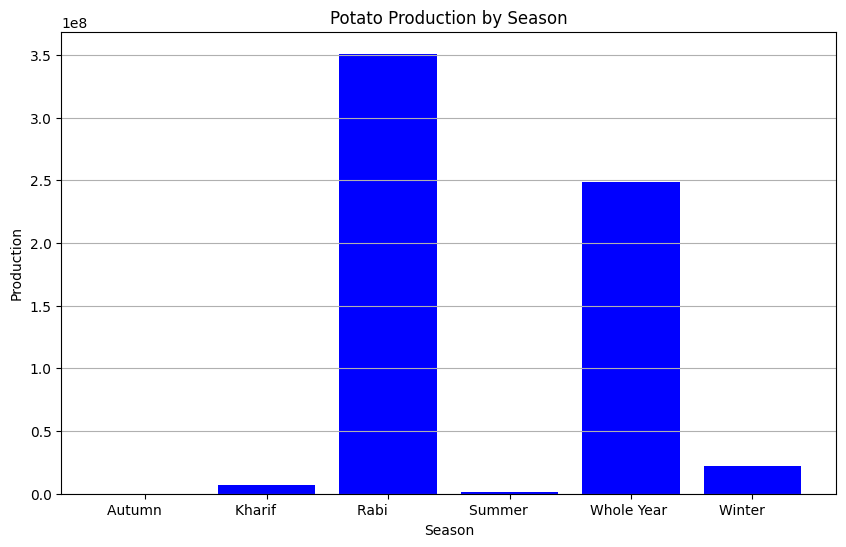

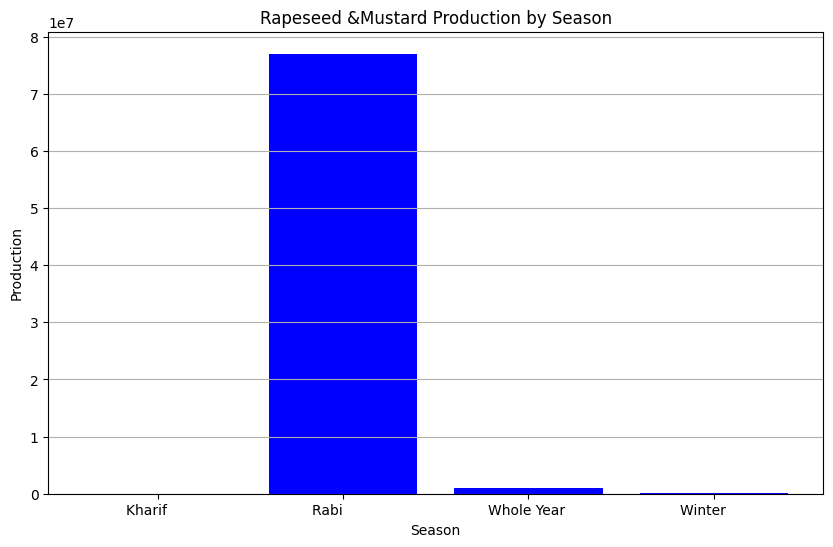

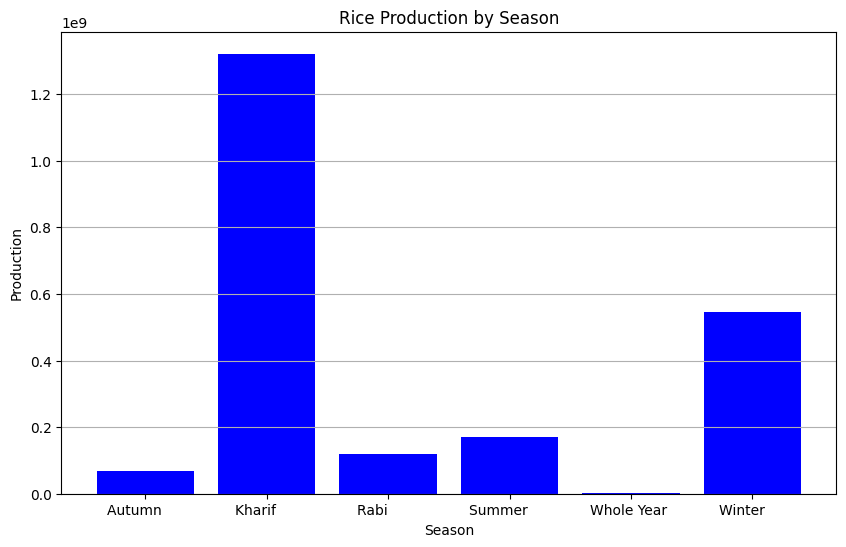

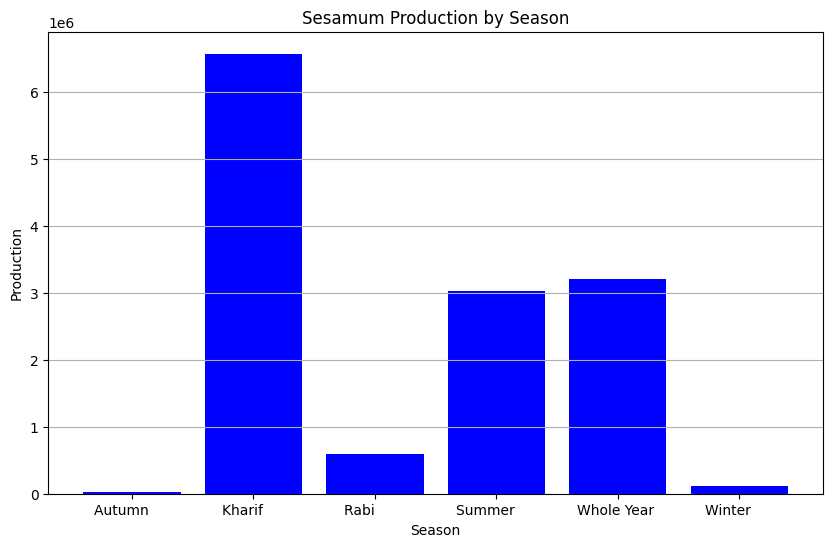

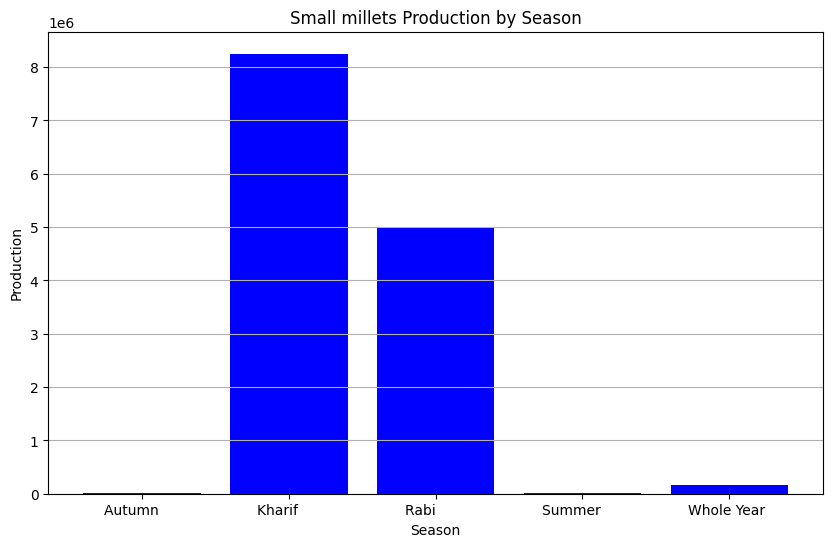

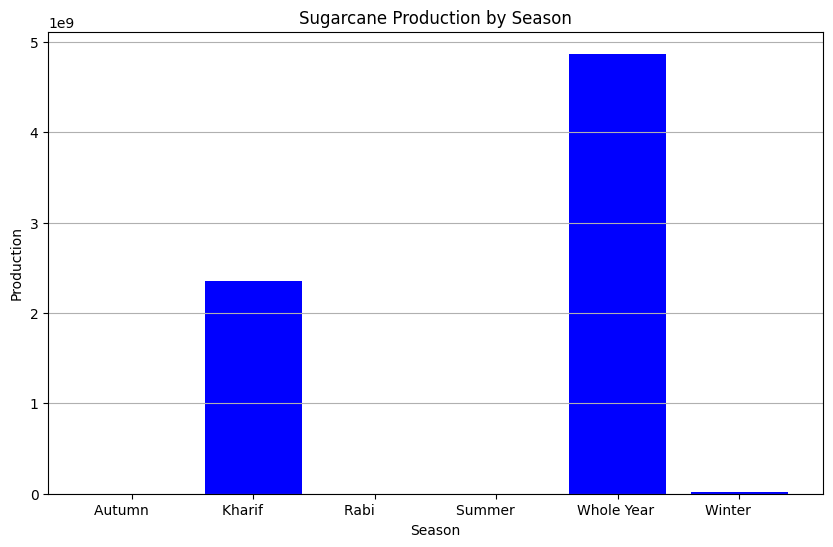

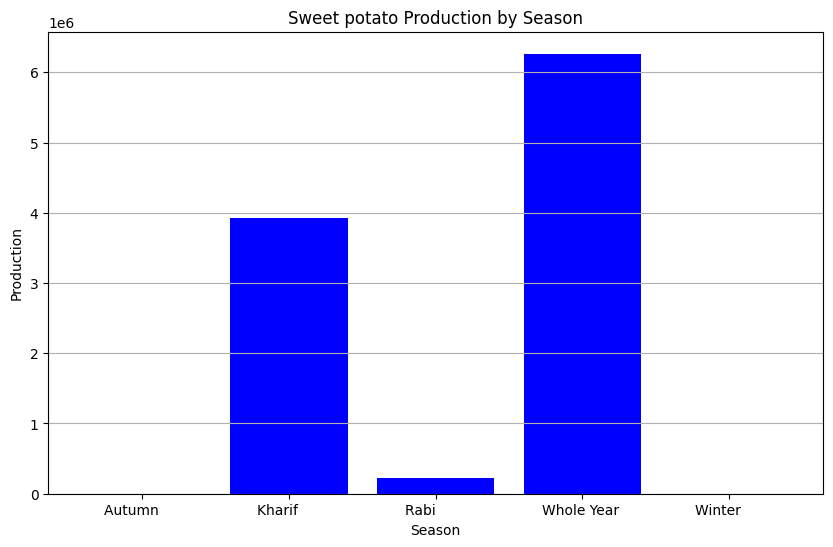

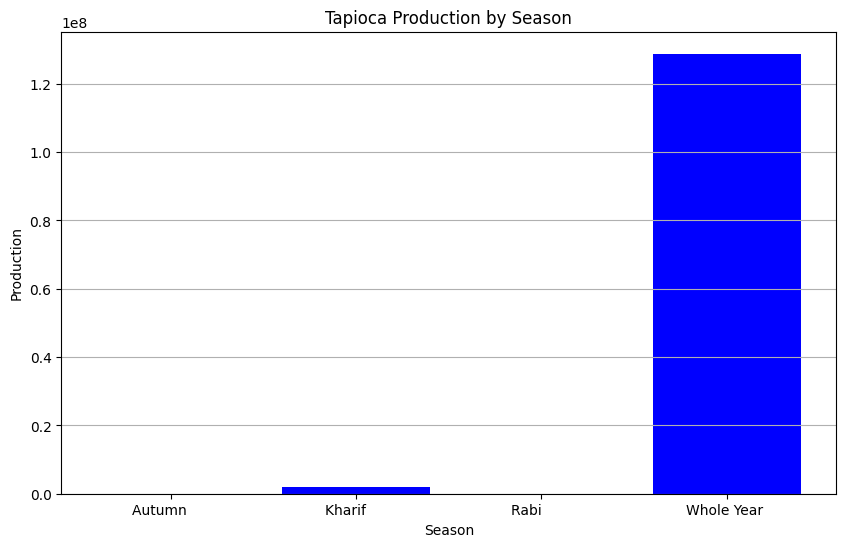

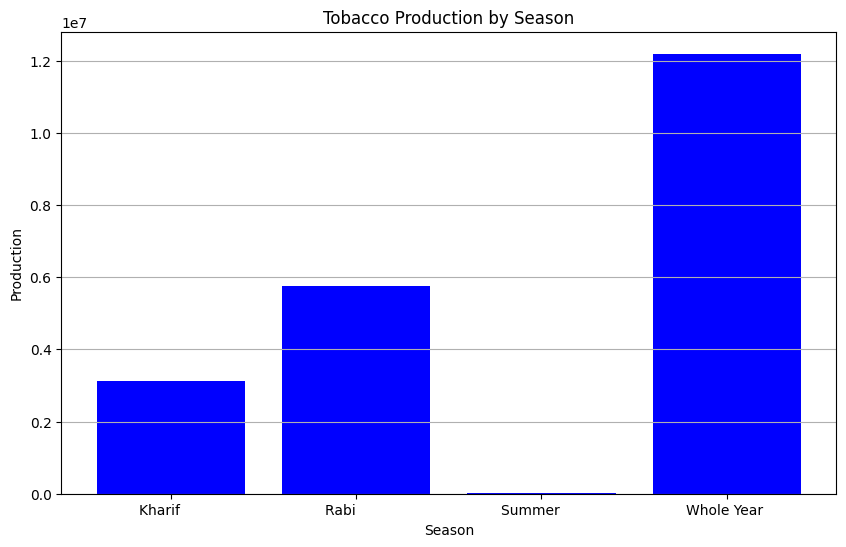

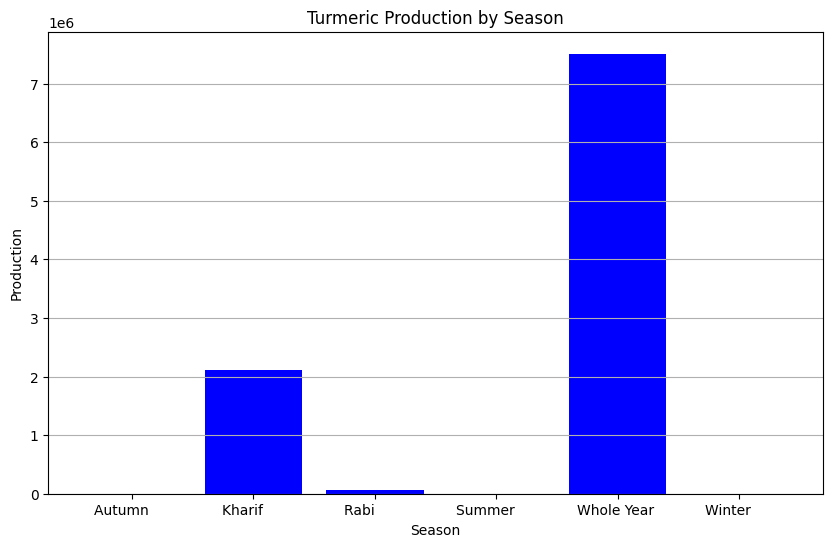

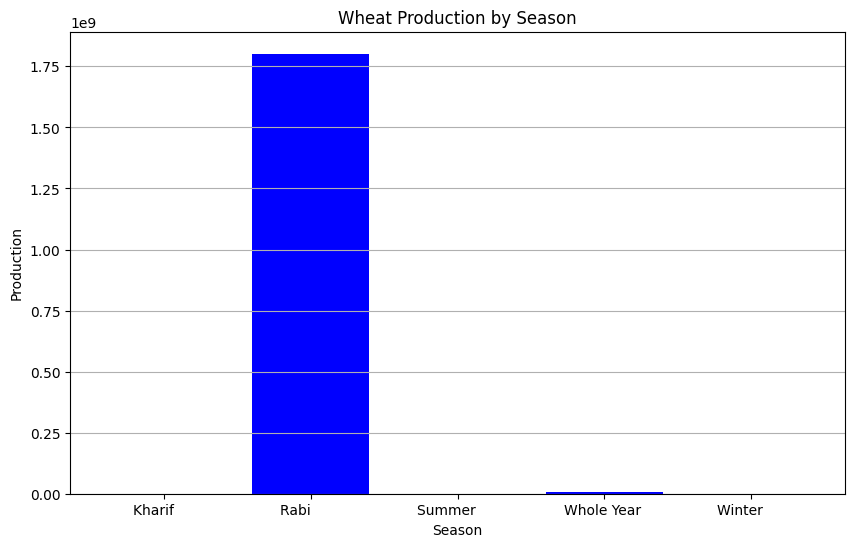

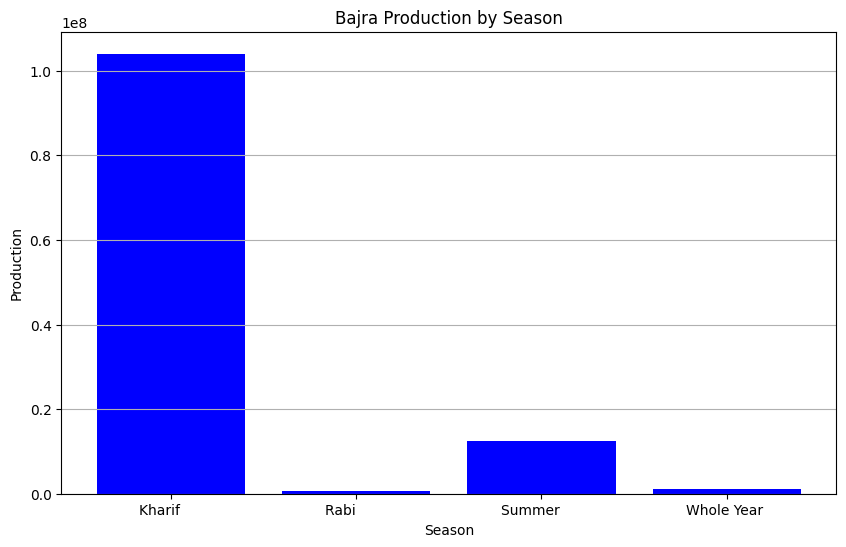

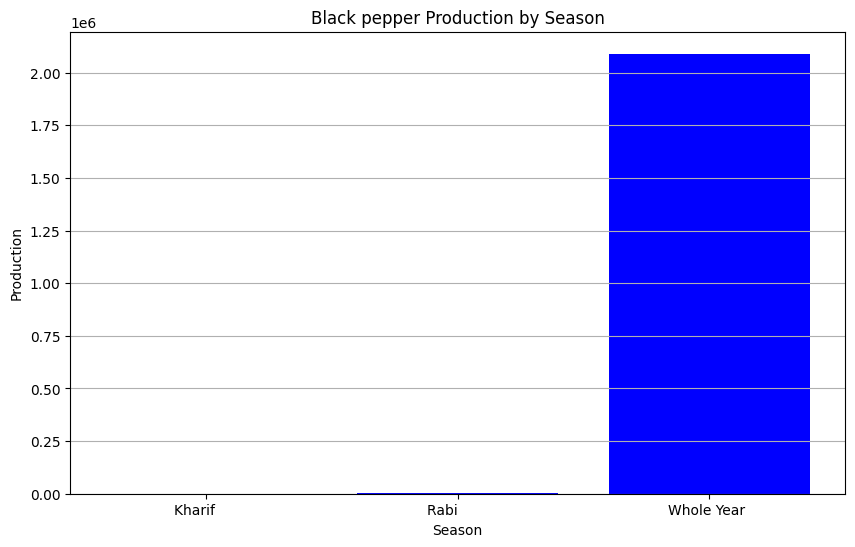

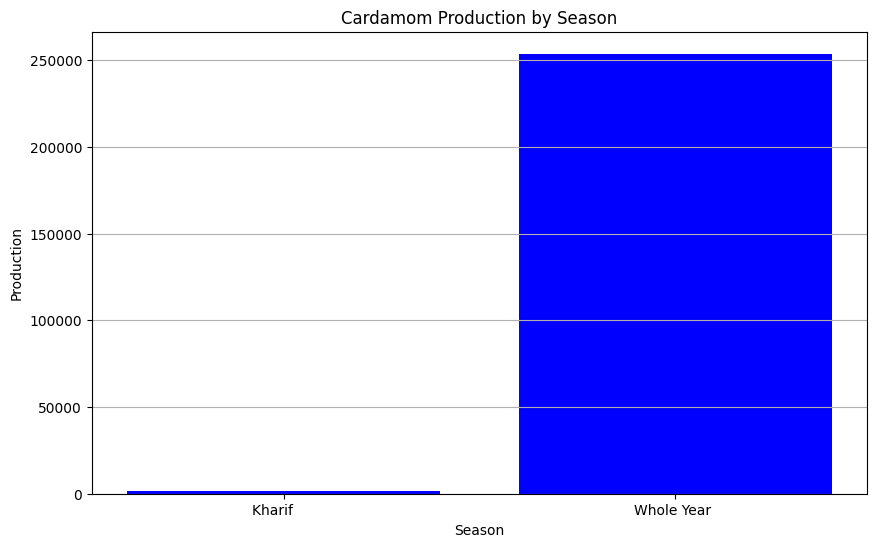

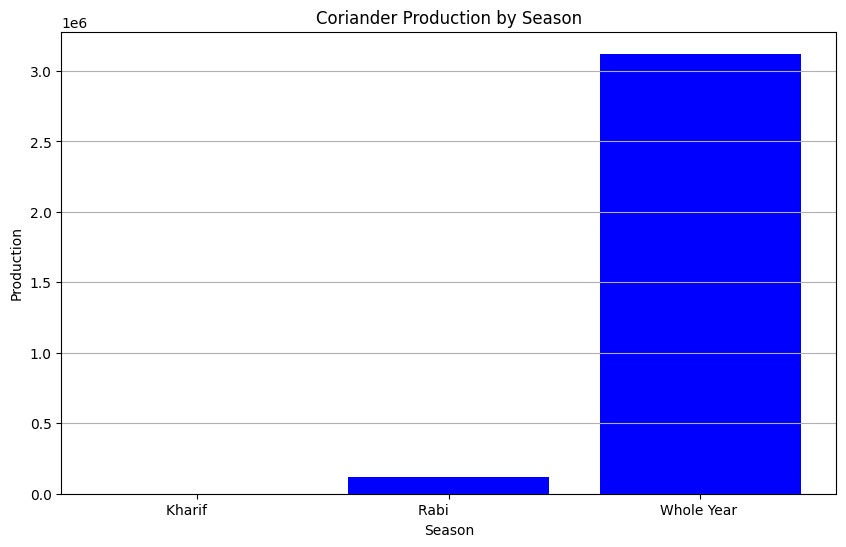

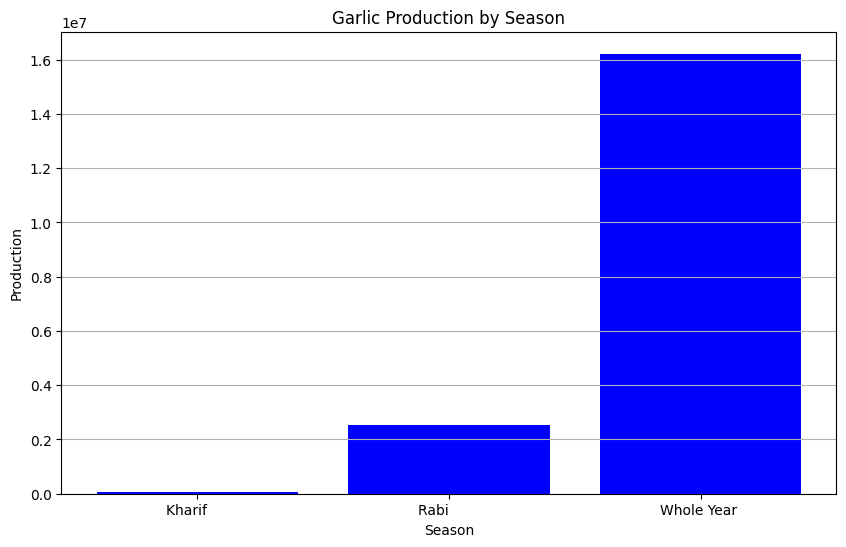

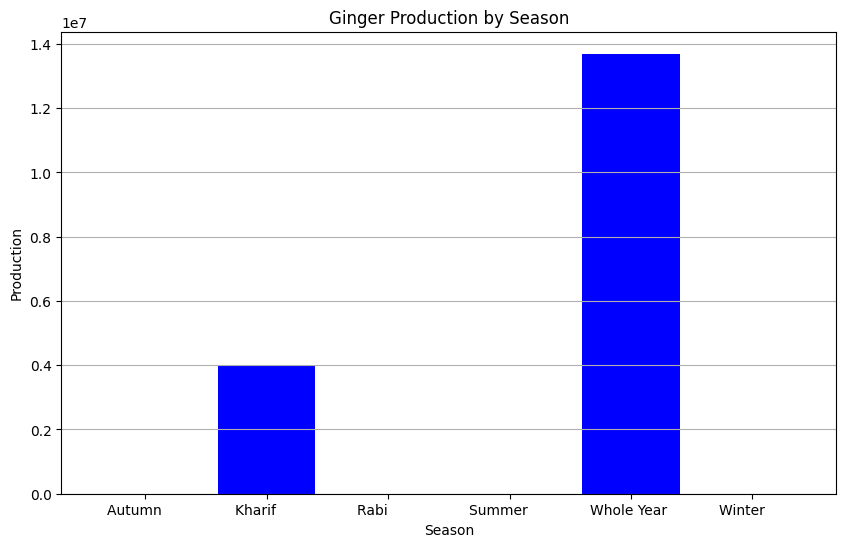

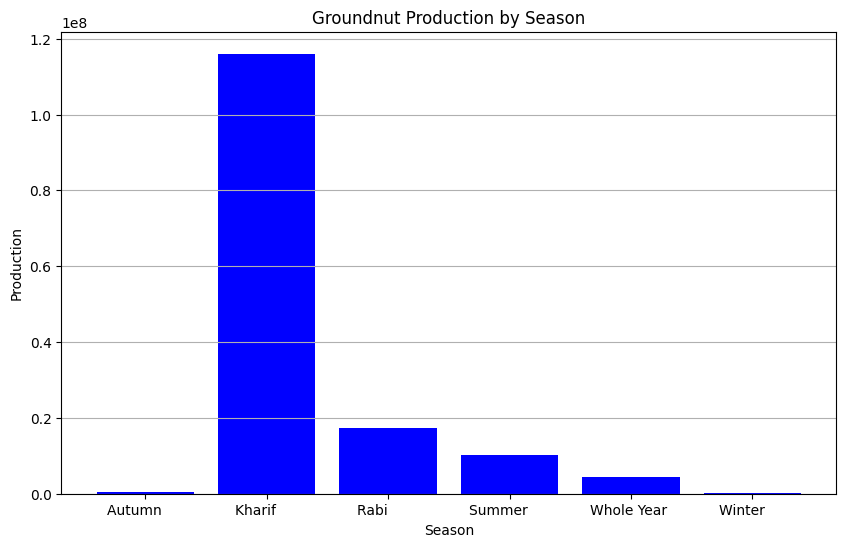

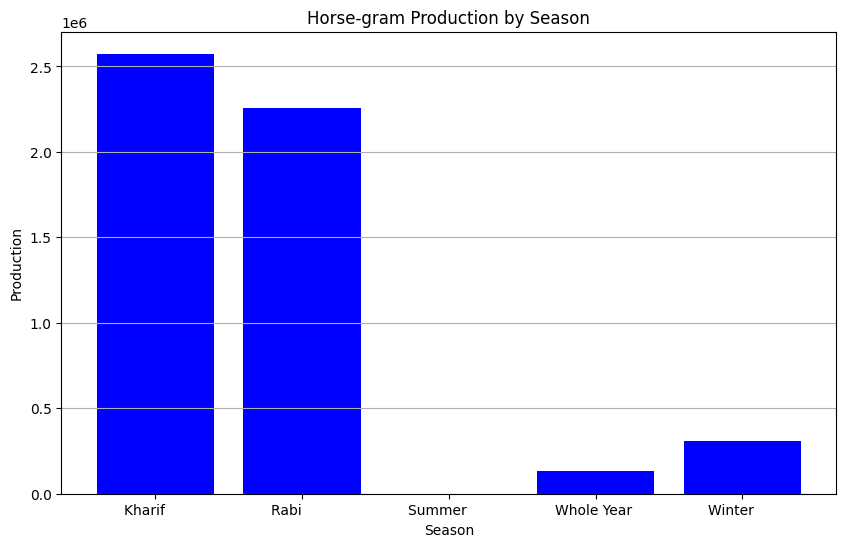

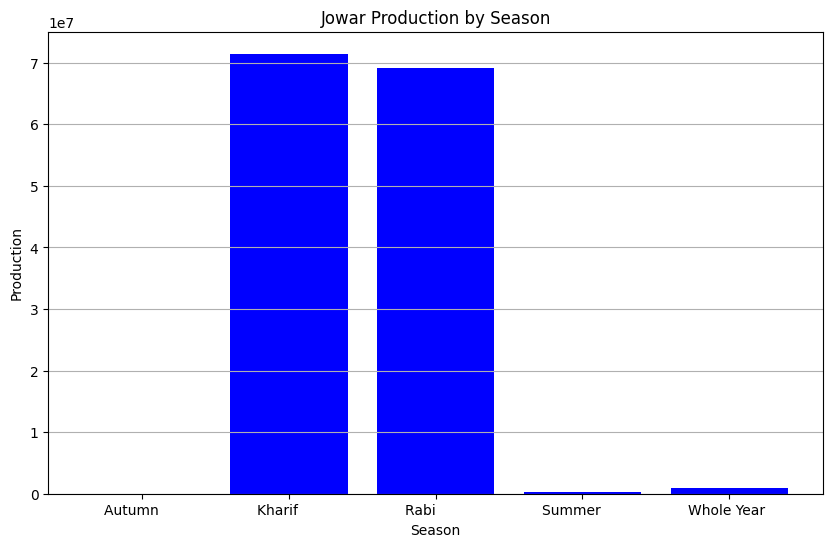

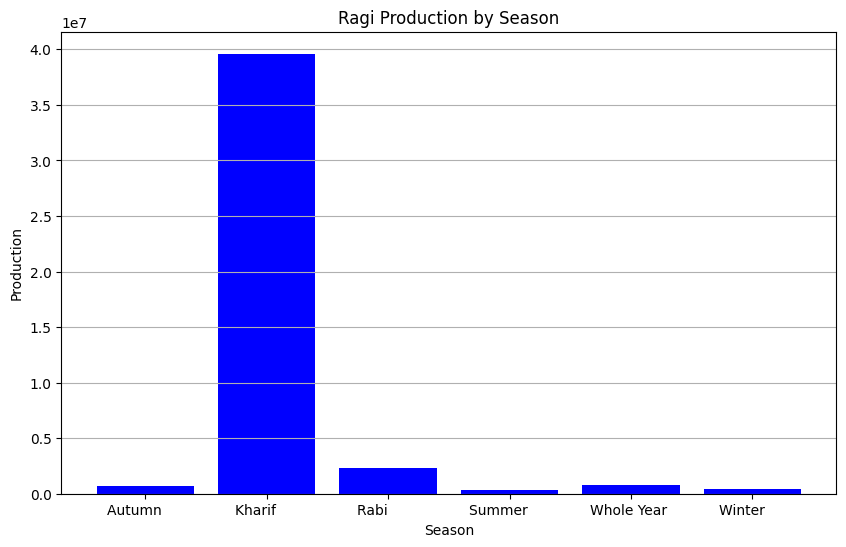

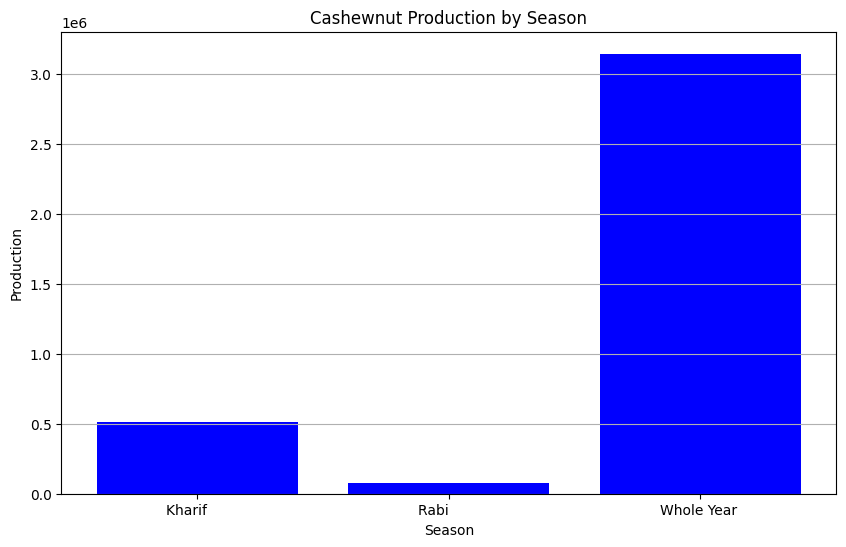

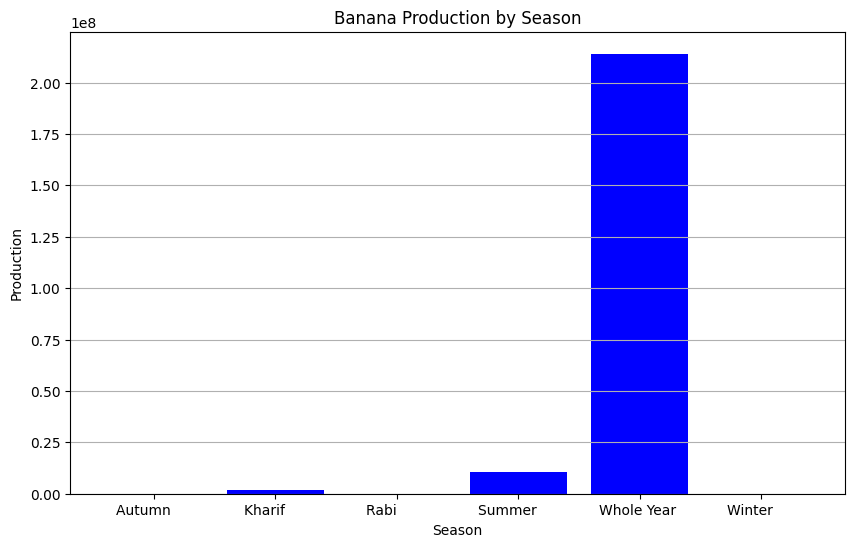

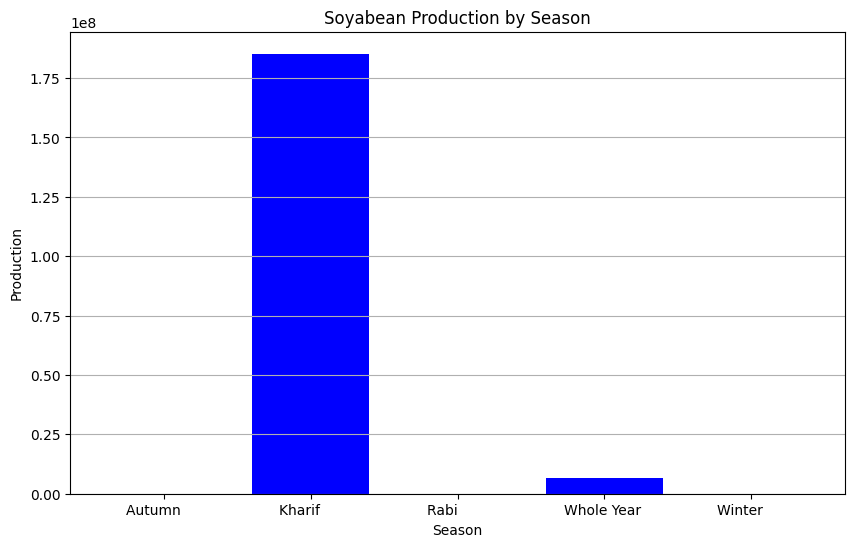

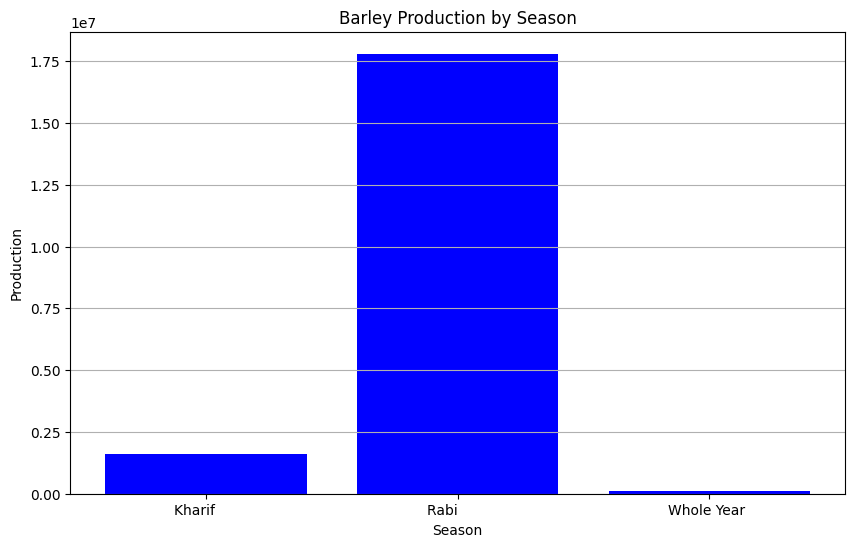

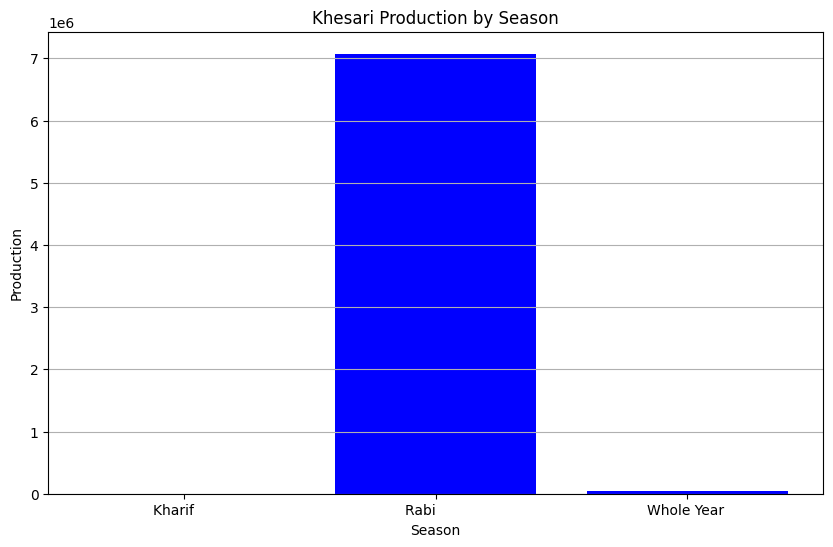

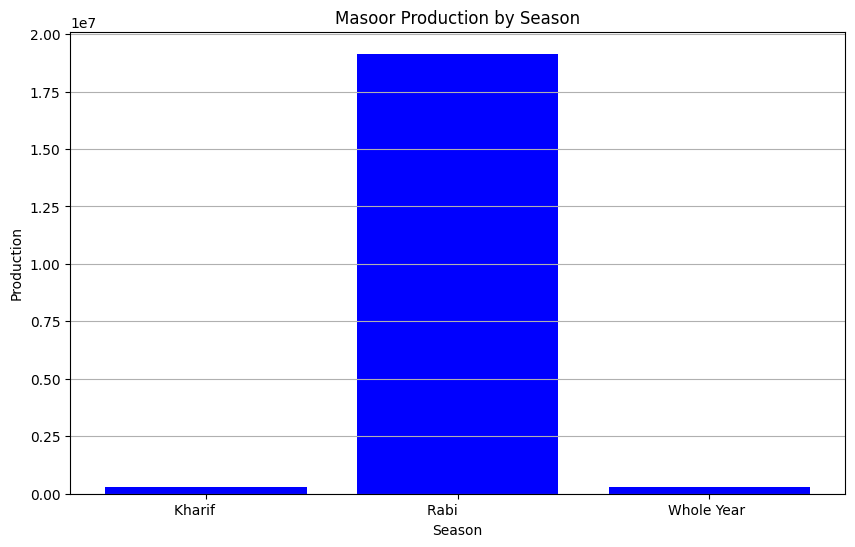

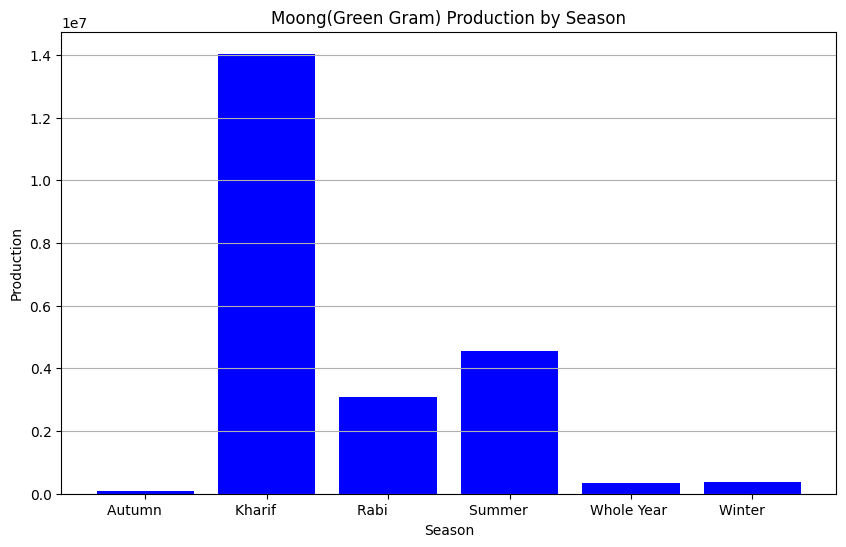

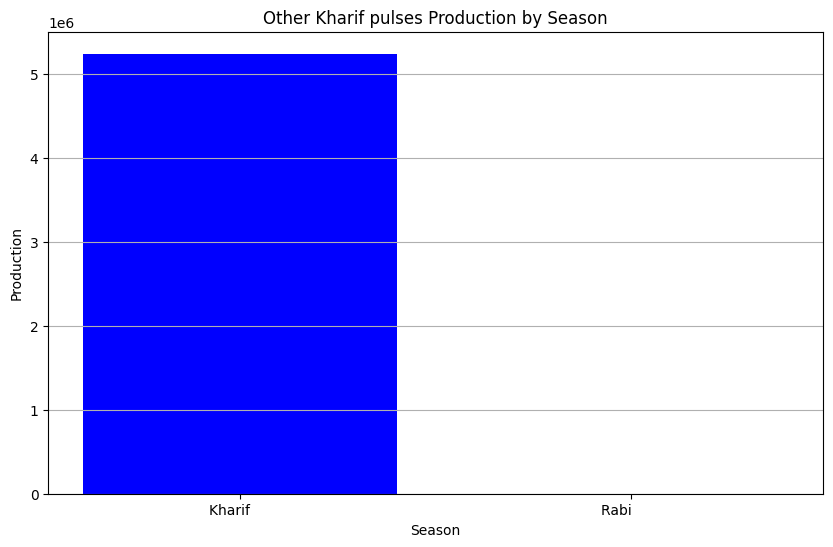

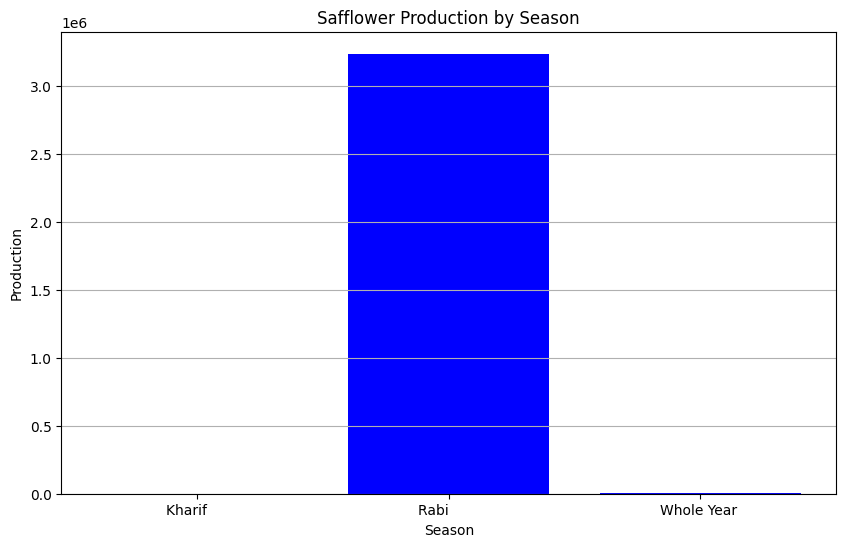

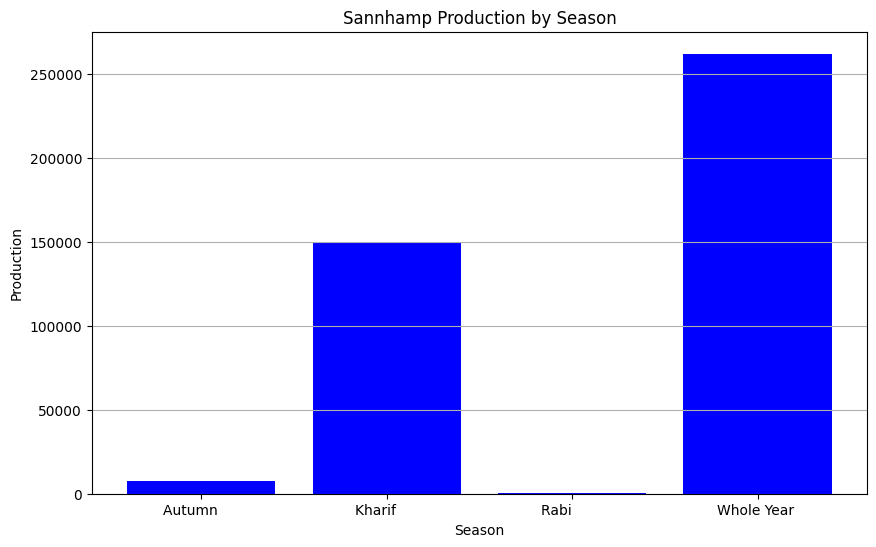

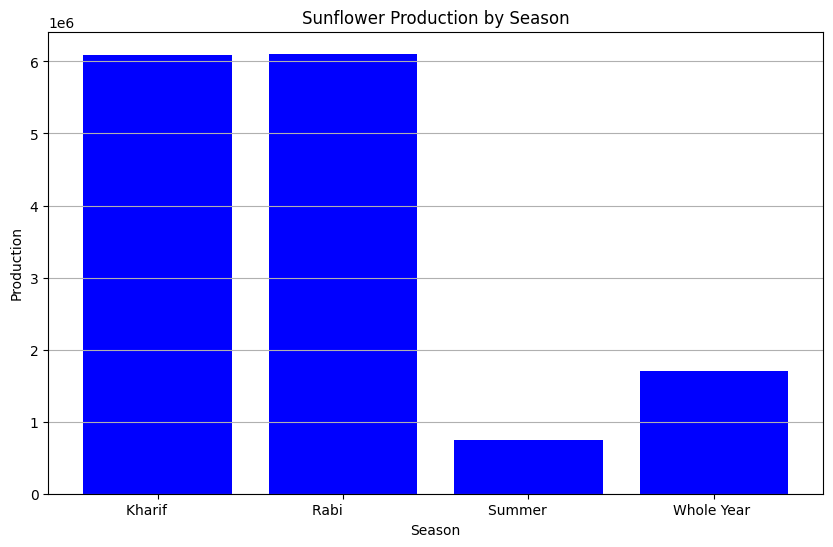

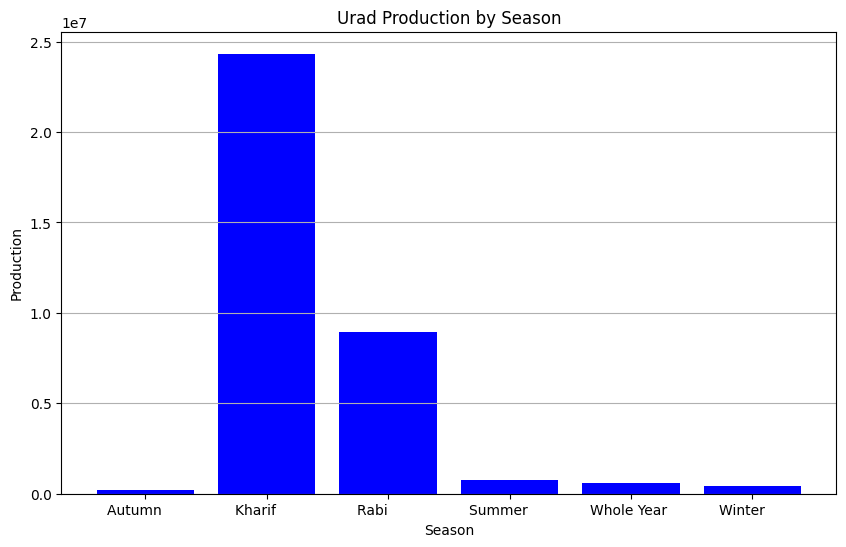

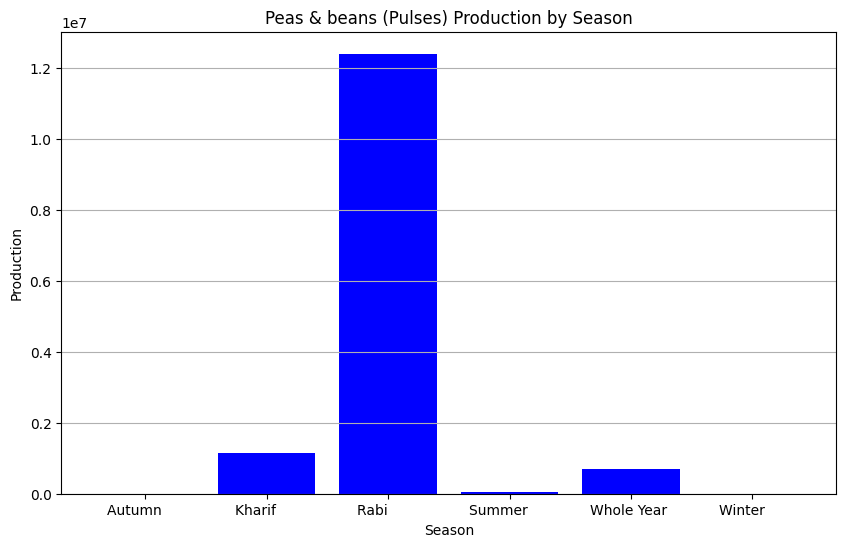

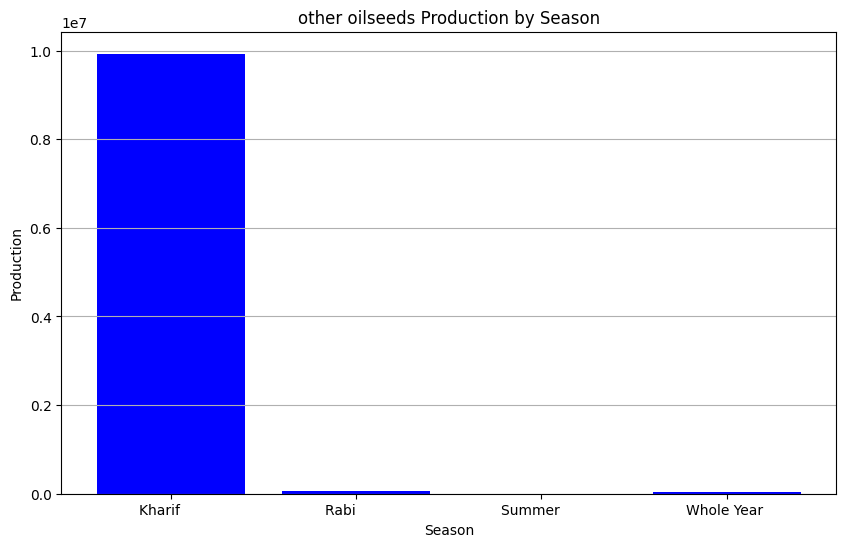

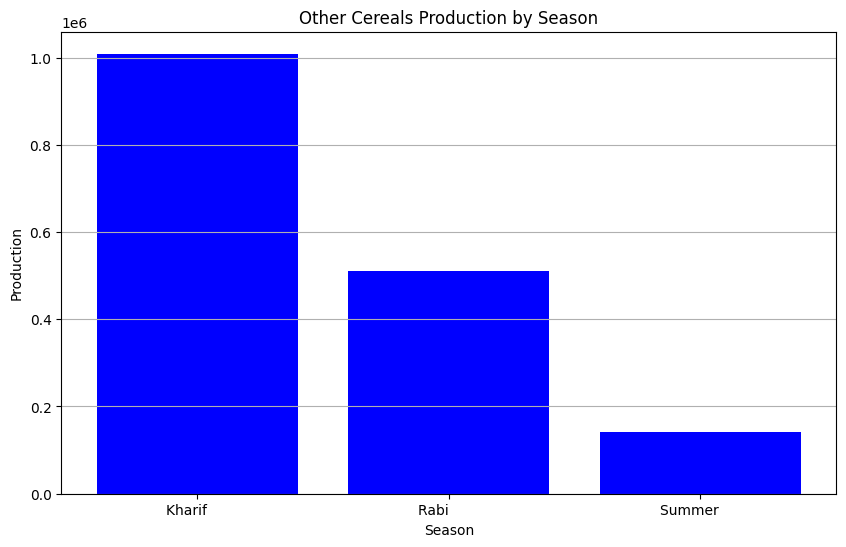

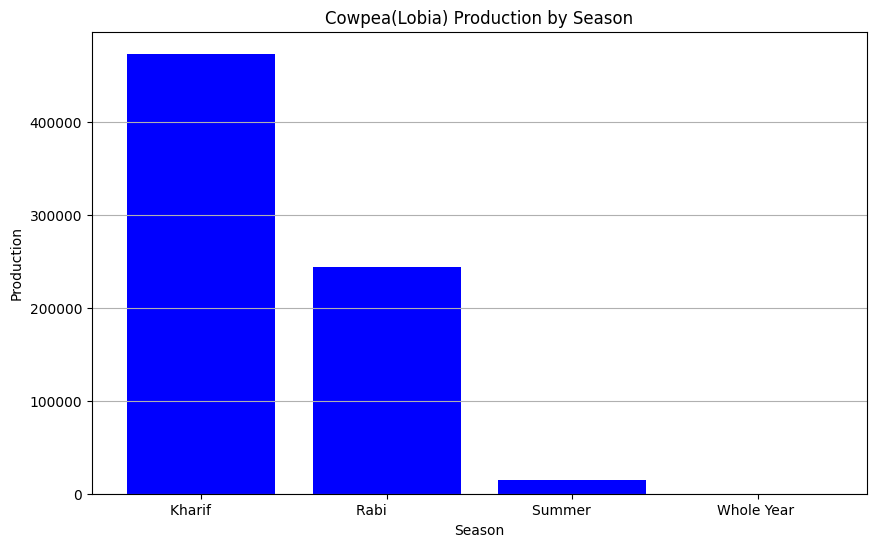

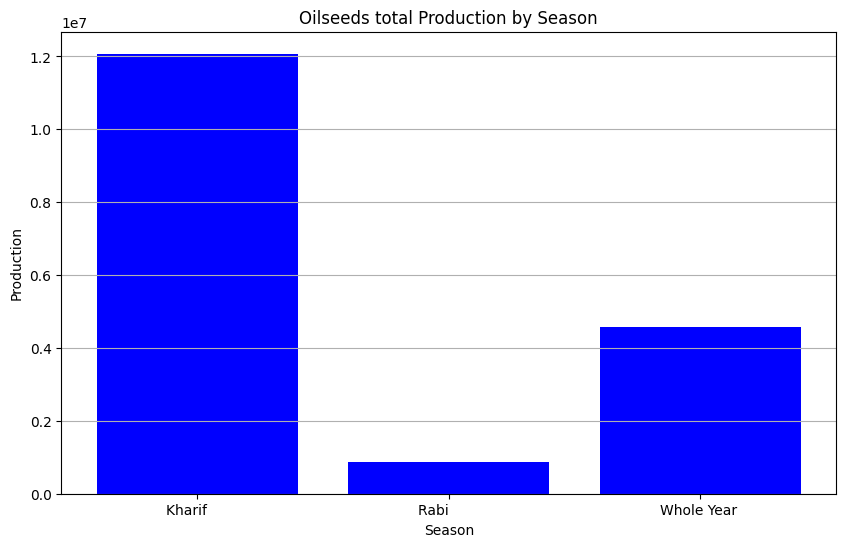

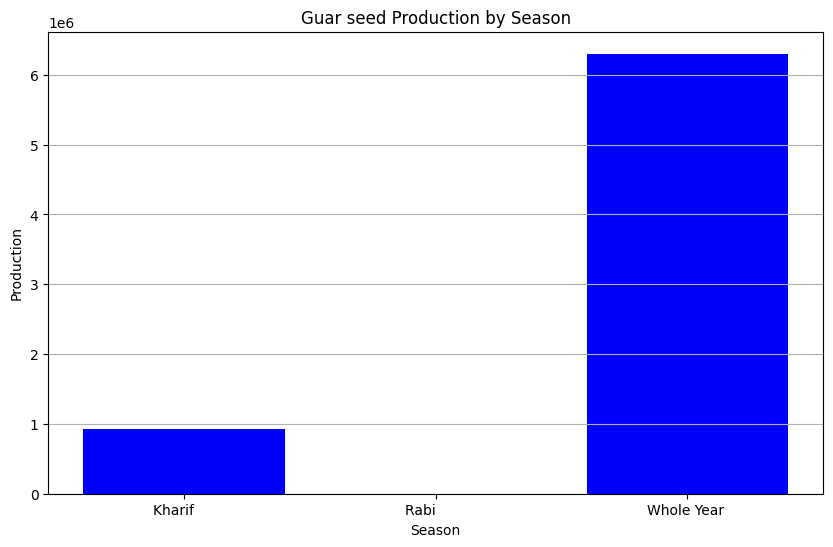

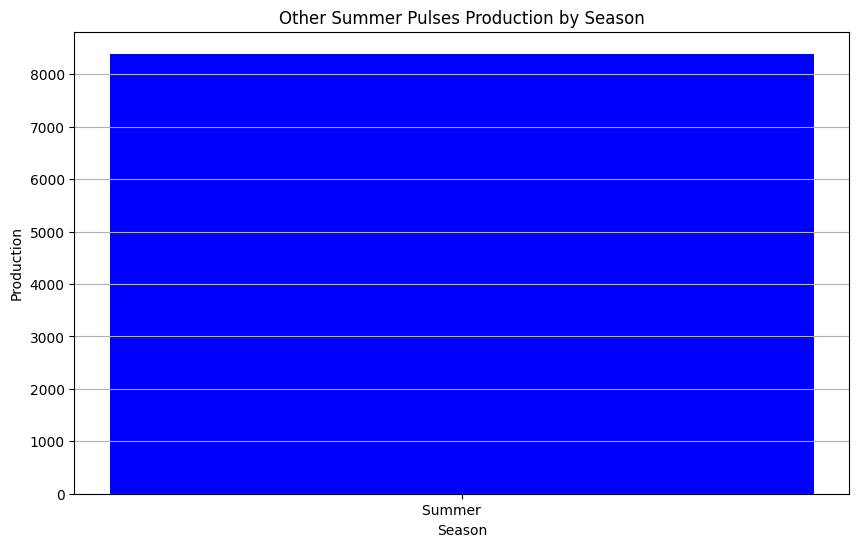

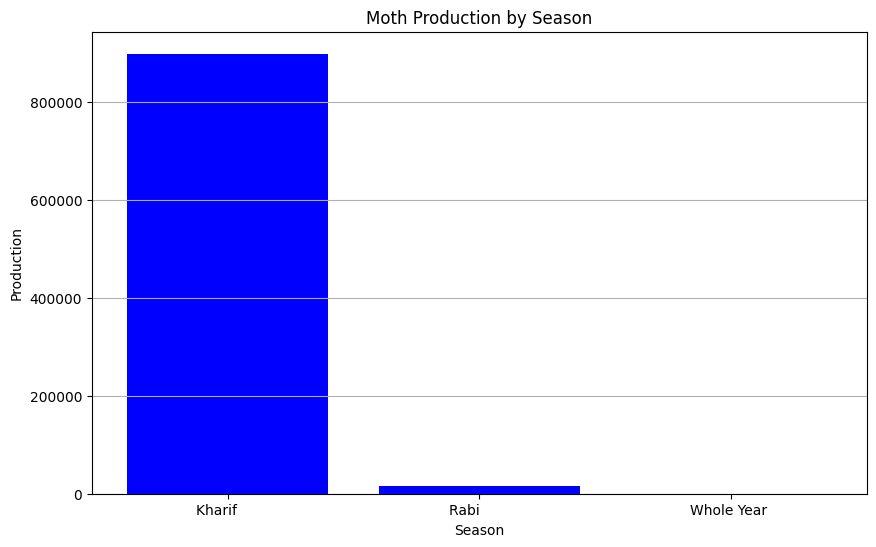

In [ ]:
# Iterate through each unique crop
for crop in unique_crops:
    crop_data = data[data['Crop'] == crop]

    seasonal_production = crop_data.groupby('Season')['Production'].sum()
    plt.figure(figsize=(10, 6))
    plt.bar(seasonal_production.index, seasonal_production.values, color='b')
    plt.title(f'{crop} Production by Season')
    plt.xlabel('Season')
    plt.ylabel('Production')
    plt.grid(axis='y')
    plt.show()

Random Forest


In [ ]:
# Label Encoding for 'State', 'Crop', and 'Season'
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])
data['Crop'] = label_encoder.fit_transform(data['Crop'])
data['Season'] = label_encoder.fit_transform(data['Season'])

In [ ]:
# Scaling for numerical columns
scaler = StandardScaler()
numerical_cols = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:

# Split-out validation dataset
X = data.drop(columns=['Yield'])
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:

# Create and train the RandomForestRegressor (for regression)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (accuracy for regression)
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)
print("------------------------------------------------------------------------")
print("Mean Squared Error:", mse)
print("R-squared (Accuracy for Regression):", r2_accuracy*100)

------------------------------------------------------------------------
Mean Squared Error: 43791.325057379894
R-squared (Accuracy for Regression): 94.68873312891559


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (accuracy for regression)
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)
print("------------------------------------------------------------------------")
print("Mean Squared Error:", mse)
print("R-squared (Accuracy for Regression):", r2_accuracy*100)

------------------------------------------------------------------------
Mean Squared Error: 562860.1131769102
R-squared (Accuracy for Regression): 31.733048309129728


In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

model = DecisionTreeRegressor( random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (accuracy for regression)
mse = mean_squared_error(y_test, y_pred)
r2_accuracy = r2_score(y_test, y_pred)
print("------------------------------------------------------------------------")
print("Mean Squared Error:", mse)
print("R-squared (Accuracy for Regression):", r2_accuracy*100)

------------------------------------------------------------------------
Mean Squared Error: 12395.224346463976
R-squared (Accuracy for Regression): 98.49663502201018
